<a href="https://colab.research.google.com/github/sayak-1108/House-Price-Prediction/blob/main/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd    # Pandas is a Python library used for working with data sets.
import numpy as np     #NumPy is a Python library used for working with arrays, linear algebra, fourier transform, and matrices.
import seaborn as sns  #Seaborn is a library that uses Matplotlib underneath to plot graphs.
from matplotlib import pyplot as plt   #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [ ]:
#Mount google drive to google colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#import training dataset from google drive
HousingData = pd.read_csv("/content/gdrive/My Drive/House price dataset/Housing.csv")
HousingData.head()  #Gives first five rows of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#converting all int values to float
HousingData.replace(('yes', 'no'), (1, 0), inplace=True)
HousingData.replace(('furnished', 'unfurnished', 'semi-furnished'), (1, 0, 0.5), inplace=True)
HousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [ ]:
HousingData.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [ ]:
HousingData.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

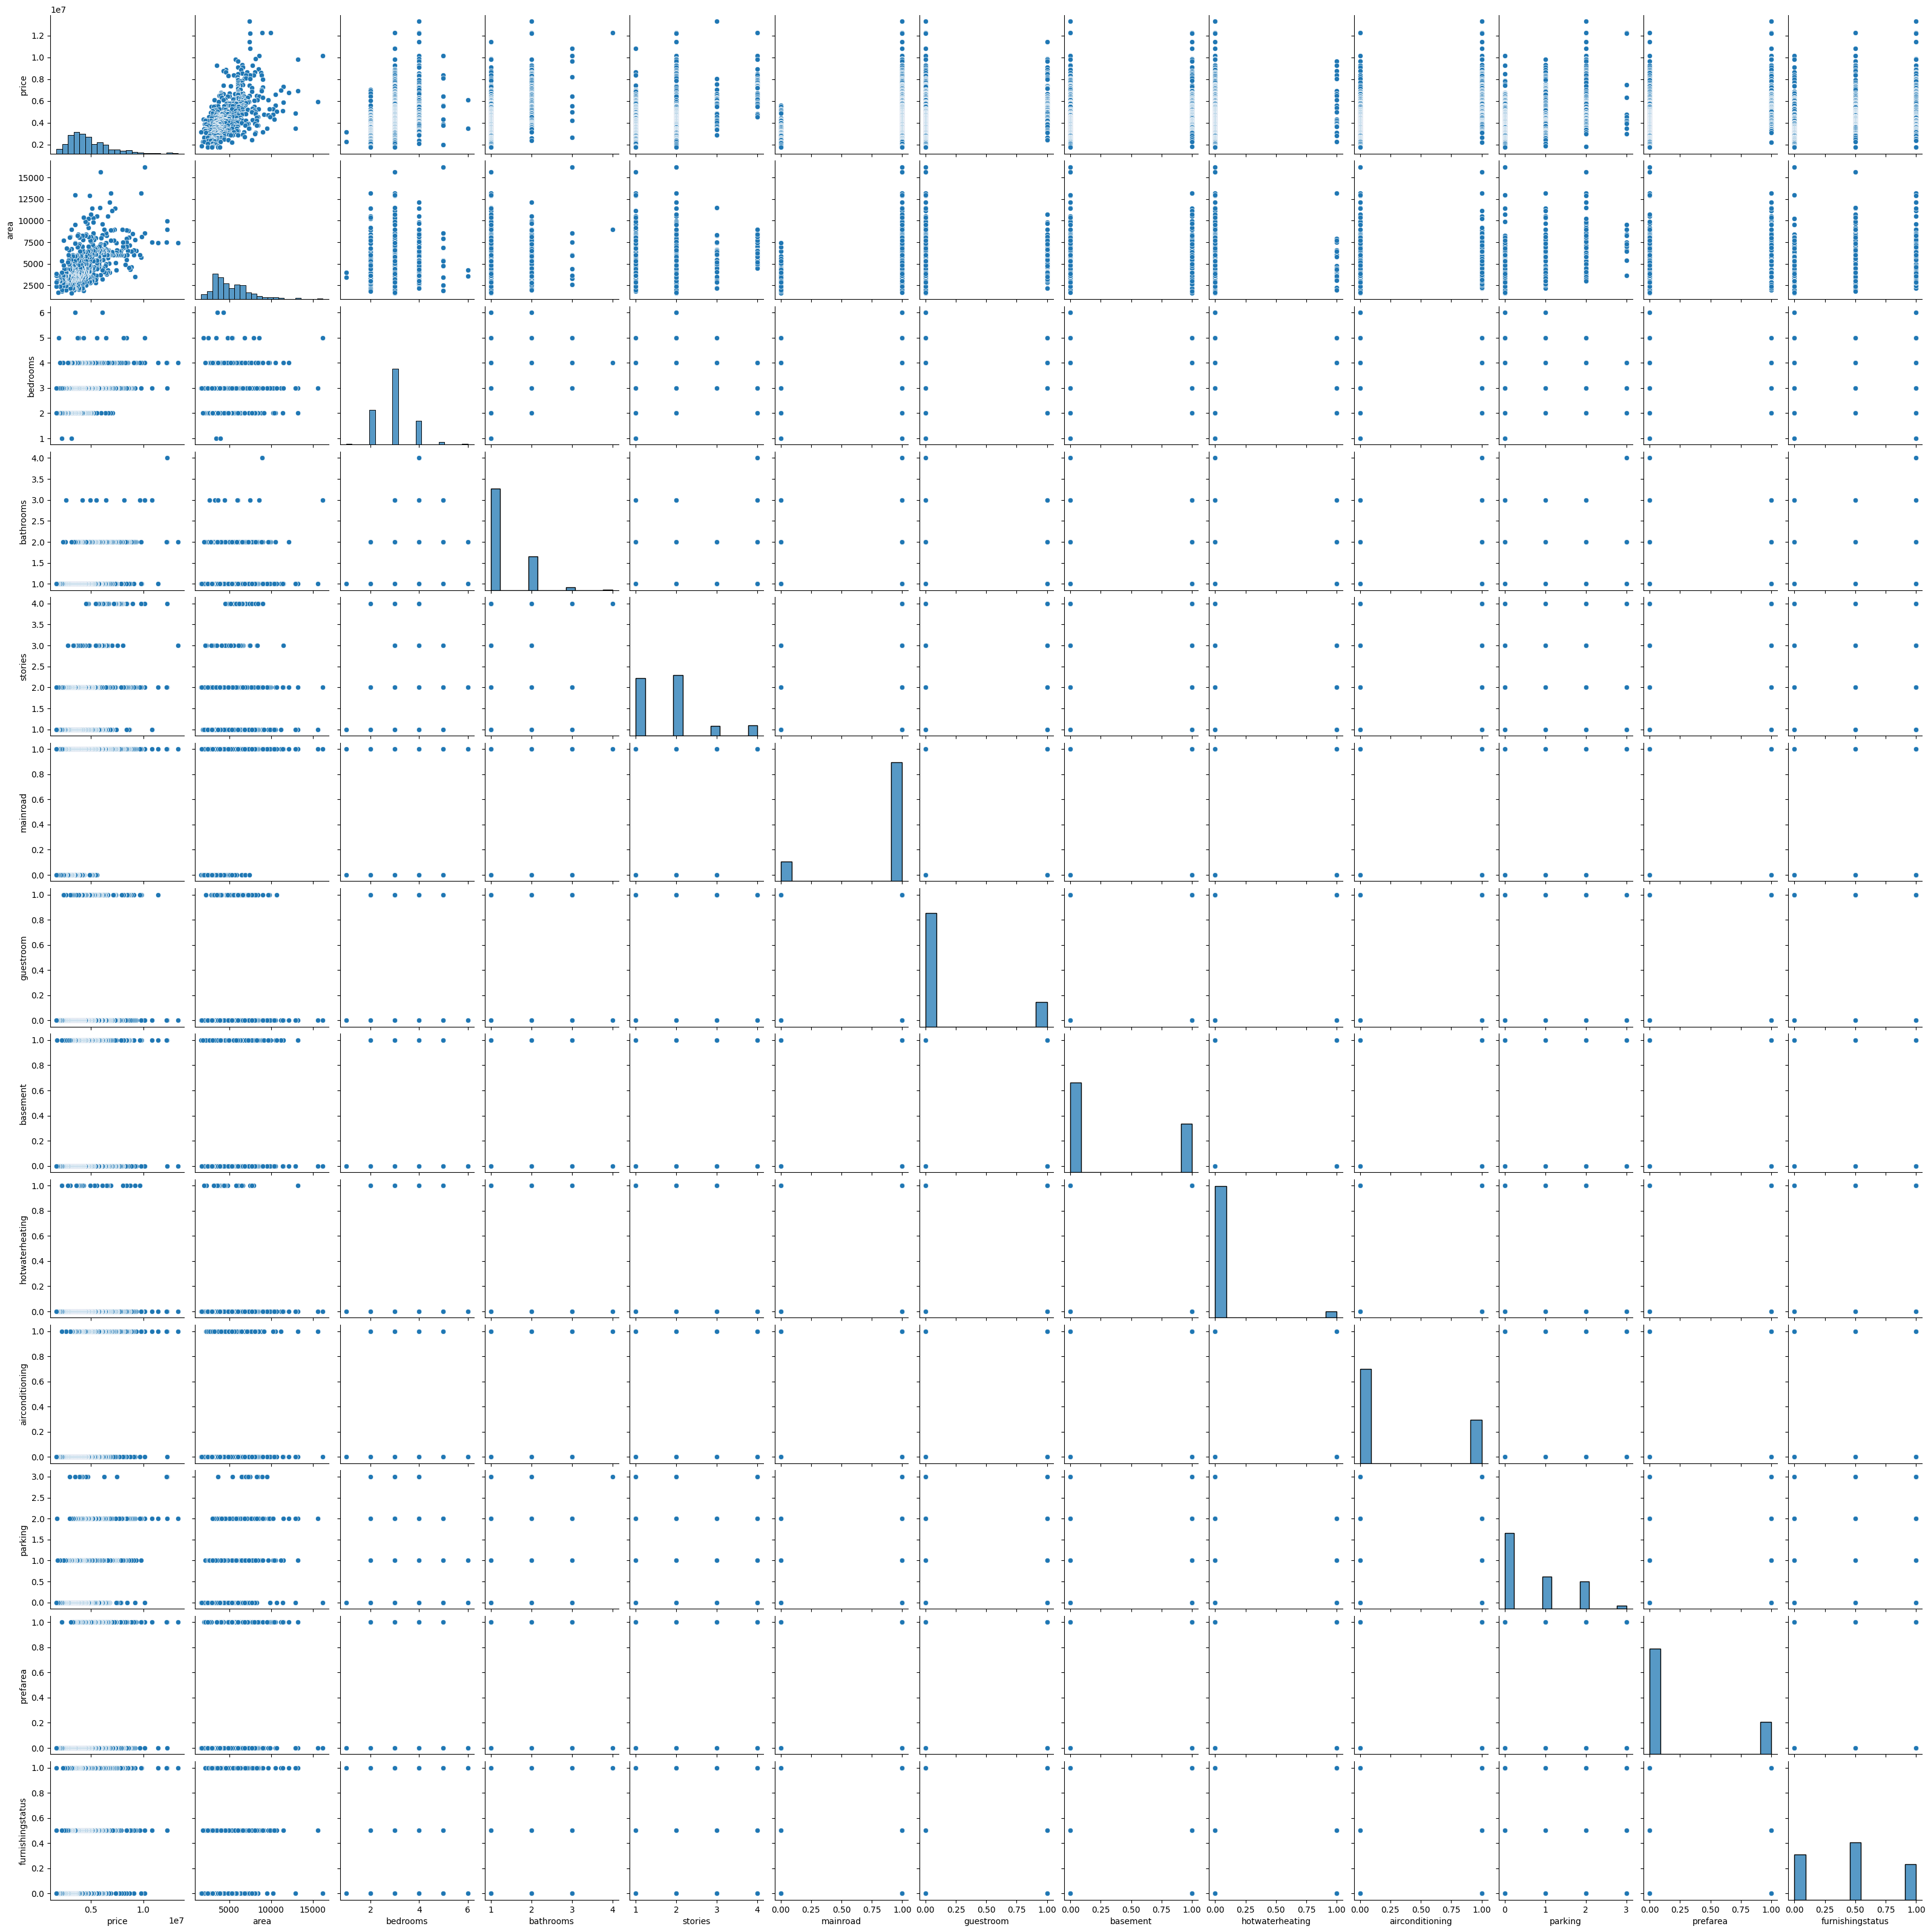

In [ ]:
sns.pairplot(HousingData)

<Axes: >

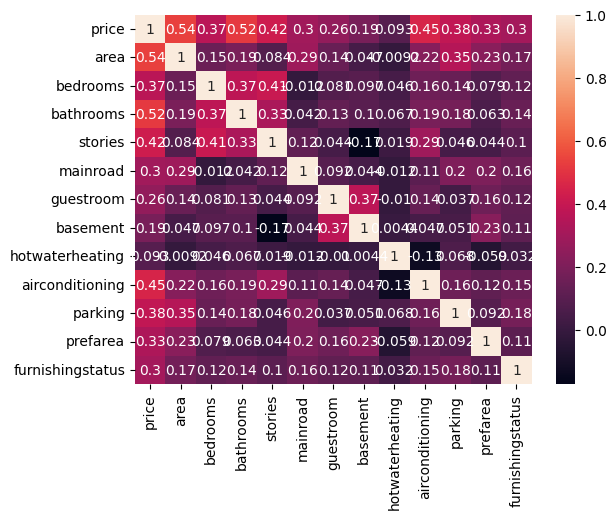

In [ ]:
sns.heatmap(HousingData.corr(), annot = True)

In [ ]:

X = HousingData[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

y =  HousingData[['price']]

In [ ]:
"""the train_test_split function from the model_selection module of the sklearn (Scikit-learn) library.
The train_test_split function is commonly used in machine learning tasks to split a dataset into training and testing subsets."""
from sklearn.model_selection import train_test_split

In [ ]:
#test_size=0.10: Specifies that 10% of the data will be used for testing, and the remaining 90% will be used for training.
#random_state=136: The random state value ensures reproducibility by fixing the random seed. Using the same random state value will yield the same train-test split each time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=136)

In [ ]:
#viewing train dataset
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
434,3792,4,1,2,1,0,0,0,0,0,0,0.5
479,3660,4,1,2,0,0,0,0,0,0,0,0.0
500,2800,3,1,1,1,0,0,0,0,0,0,0.0
260,3162,3,1,2,1,0,0,0,1,1,0,1.0
523,2787,4,2,2,1,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10,13200,3,1,2,1,0,1,0,1,2,1,1.0
63,6360,4,2,3,1,0,0,0,1,2,1,1.0
54,6000,3,2,2,1,1,0,0,1,1,0,0.5
233,4160,3,1,1,1,1,1,0,1,0,0,0.0


In [ ]:
#Importing linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
#training the model
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
lin_reg.score(X_test,y_test)

0.5853305868900504

In [ ]:
predictions = lin_reg.predict(X_test)

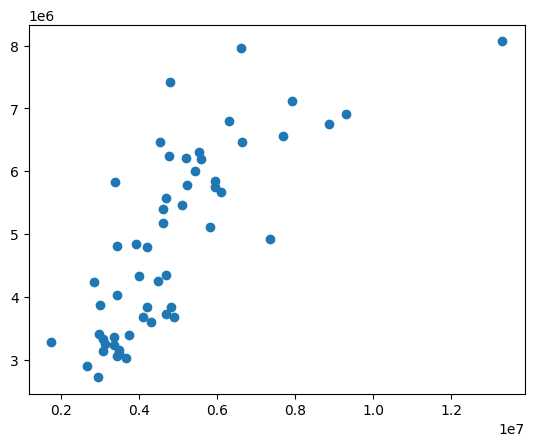

In [ ]:
plt.scatter(y_test, predictions)

<ipython-input-31-dbf516cadfb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=75);


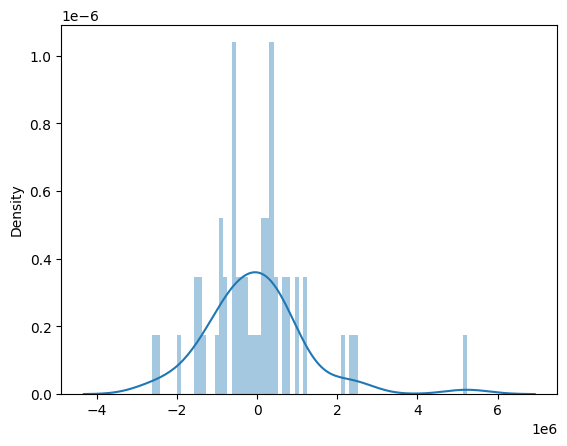

In [ ]:
sns.distplot((y_test-predictions),bins=75);